# You can ignore this file as it was an attempt at downloading files but unfortunately google blocks the attempts after certain number of attempts

In [ ]:
import os

# installing libraries required to run program through os library by running it in terminal/console
os.system('pip install -r requirements.txt')

In [1]:
# Imports for program

# To gather data for US States
import us

# To perform search query, navigate and extract links, and download data from each link obtained
from bs4 import BeautifulSoup
import random
from datetime import datetime
import time
import requests as r

import re
import json
from os import path
 
# k-means algorithm to create clusters
from sklearn.cluster import KMeans

In [125]:
# Function to get the visible web results from google search
def googleSearch(agent:int, q:str, num_pages:int): 
    # user_agents = [
    #     'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    #     'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
    #     'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    #     'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    #     'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    #     'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
    #     'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
    # ]
    user_agents=[
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
        'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
        'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/46.0.2490.71 Safari/537.36',
        'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/21.0.1180.83 Safari/537.1'
    ]
    # Set headers
    headers = {
        'User-Agent': user_agents[agent]}
    print(headers['User-Agent'])

    session = r.session()
    q = '+'.join(q.split())
    url = f'https://www.google.com/search?q={q}&num={num_pages}'
    # response = r.get(url) # Changes output of class and id names
    response = session.get(url, headers=headers)
    print(response.status_code, response.reason, '\n', response.text)
    session.close()
    soup = BeautifulSoup(response.text, 'html.parser')
    # print(soup.prettify())
    temp = soup.find_all('a', href=True)

    sub_s = '/url?q=' # if User-Agent not set, this is going to show up at front of url
    # links = [a['href'].replace(sub_s, '') for a in temp if sub_s in a['href'] and 'google' not in a['href']] # Use if no headers
    links = [a['href'].replace(sub_s, '') for a in temp if ('https' in a['href'] or 'http' in a['href']) and 'google' not in a['href'] and 'search' not in a['href']]
    print('links: ', links)
    
    return links

In [103]:
# Write each of the links into a text file
def write_links(results:list, state:str):
    time = datetime.now().strftime("%Y-%m-%d %H-%M-%S")
    with open(f'./links/{state}_links_{time}.txt', 'a') as f:
        for items in results:
            f.write('%s\n' %items)
        print(f'{state} links written successfully')

In [25]:
# Extract info on all states
us_states = [state.name for state in us.states.STATES]
# Main query variable
query = "storm article"
# Storage dictionary for all states
all_links = {}

5
Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36
200 OK 
 <!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="origin" name="referrer"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>georgia storm article - Google Search</title><script nonce="LruCY8VJN8jTkIEI2ieiHA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(
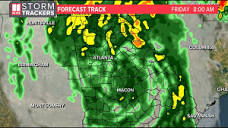
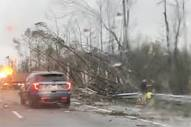
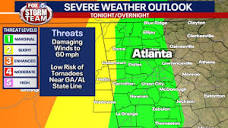
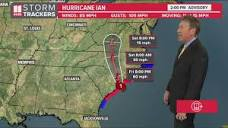

['/url?esrc=s&q=&rct=j&sa=U&url=https://www.13wmaz.com/article/weather/strong-winds-knocks-down-trees-damages-homes-in-ga/93-e6a67f16-2ff6-40b7-a475-b70c7a8a409f&ved=2ahUKEwj-9-T6la6AAxWCTTABHSsMB2sQFnoECB0QAg&usg=AOvVaw0iuixhKj-PJy9GqDfX5LUR',
 '/url?esrc=s&q=&rct=j&sa=U&url=https://www.11alive.com/article/weather/severe-thunderstorms-metro-atlanta/85-a488ad40-1a8c-4dcc-a6be-29516fc043e8&ved=2ahUKEwj-9-T6la6AAxWCTTABHSsMB2sQFnoECBgQAg&usg=AOvVaw3WW6JdqSQv9KV9opVAnK7L',
 '/url?esrc=s&q=&rct=j&sa=U&url=https://www.11alive.com/article/weather/timeline-storms-north-georgia/85-77ae869f-cebc-4085-97f8-b1ba9c0eb5b1&ved=2ahUKEwj-9-T6la6AAxWCTTABHSsMB2sQFnoECB8QAg&usg=AOvVaw1NcUBGsxRdtLYu_7k9IOV7',
 '/url?esrc=s&q=&rct=j&sa=U&url=https://apnews.com/article/storms-tornadoes-damage-texas-georgia-alabama-7db6ee2cb28cca3794a7f074d3129071&ved=2ahUKEwj-9-T6la6AAxWCTTABHSsMB2sQFnoECBoQAg&usg=AOvVaw30g_uRnKAytulCSl0oSaBu',
 '/url?esrc=s&q=&rct=j&sa=U&url=https://www.nbcnews.com/news/us-news/georgia-go

In [127]:
# Example individual function call
user_agent = random.randint(0,6)
print(user_agent)
result = googleSearch(user_agent, 'georgia storm article', 30)
result

In [120]:
# If using google library to download files - risk of being temporarily blocked from crawling
# try:
#     from googlesearch import search
# except ImportError:
#     print("No module named 'google' found")

In [ ]:
# Loop through each state to gather website links
for state in us_states[:2]:
    # Create query with state name
    st_query = state + ' ' + query
    # Start timer
    then = time.time()

    # Extract links and save on dictionary under each state
    all_links[state] = googleSearch(st_query, 100)
    # all_links[state] = search(query, tld="co.in", num=30, stop=30, pause=2)

    print(all_links[state])
    write_links(all_links[state], state)
    # Check if delay is enough to proceed with new request
    now = time.time()
    delay = then + 0.600 - now
    then = now
    if delay >= 0:
        time.sleep(delay)

In [32]:
# Check length of dictionary, should be 50
len(all_links)
all_links

{'Alabama': [],
 'Alaska': [],
 'Arizona': [],
 'Arkansas': [],
 'California': [],
 'Colorado': [],
 'Connecticut': [],
 'Delaware': [],
 'Florida': [],
 'Georgia': [],
 'Hawaii': [],
 'Idaho': [],
 'Illinois': [],
 'Indiana': [],
 'Iowa': [],
 'Kansas': [],
 'Kentucky': [],
 'Louisiana': [],
 'Maine': [],
 'Maryland': [],
 'Massachusetts': [],
 'Michigan': [],
 'Minnesota': [],
 'Mississippi': [],
 'Missouri': [],
 'Montana': [],
 'Nebraska': [],
 'Nevada': [],
 'New Hampshire': [],
 'New Jersey': [],
 'New Mexico': [],
 'New York': [],
 'North Carolina': [],
 'North Dakota': [],
 'Ohio': [],
 'Oklahoma': [],
 'Oregon': [],
 'Pennsylvania': [],
 'Rhode Island': [],
 'South Carolina': [],
 'South Dakota': [],
 'Tennessee': [],
 'Texas': [],
 'Utah': [],
 'Vermont': [],
 'Virginia': [],
 'Washington': [],
 'West Virginia': [],
 'Wisconsin': [],
 'Wyoming': []}